In [1]:
!pip install pandas
!pip install chefboost


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
"""
# Data preprocessing
"""

'\n# Data preprocessing\n'

In [4]:
# Read data
li = []
with open('adult.data') as f:
    lines = f.readlines()
    for line in lines:
        li.append(line[:-1].split(", "))

df = pd.DataFrame(li)

In [5]:
# rename columns and drop rows with nan values 
df = df.rename(columns={0: "age", 1: "workclass", 2: "fnlwgt", 3: "education", 4: "education-num", 5: "marital-status", 6: "occupation", 7: "relationship", 8: "race", 9: "sex", 10: "capital-gain", 11: "capital-loss", 12: "hours-per-week", 13: "native-country", 14: "income"})
df = df.dropna()

In [6]:
# drop missing values
label_workclass = ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked']
label_occupation = ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces']
label_native_country = ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']
unknown_index = []

for i in range(len(df['workclass'])):
    if df['workclass'][i] not in label_workclass:
        unknown_index.append(i)

for i in range(len(df['occupation'])):
    if df['occupation'][i] not in label_occupation:
        unknown_index.append(i)

for i in range(len(df['native-country'])):
    if df['native-country'][i] not in label_native_country:
        unknown_index.append(i)        

df = df.drop(set(unknown_index))

In [7]:
# drop meaningless column
df = df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'native-country'])

In [8]:
# one-hot encoding on nominal value columns
df = pd.get_dummies(df, dtype=int, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [9]:
# Binarization of income column
df = df.replace({'<=50K': 0, ">50K": 1})

In [10]:
# split data into training and test data
x = df[::].drop(columns=['income'])
y = df[:]['income']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [11]:
"""
# Decision tree base on CART
"""

'\n# Decision tree base on CART\n'

In [12]:
# training DTs using training data
dt = tree.DecisionTreeClassifier()
dt = dt.fit(train_x, train_y)

In [13]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [14]:
predict_y = dt.predict(test_x)
scores = cross_val_score(dt, x, y, cv=10)
print('='*10 + "CART" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % dt.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print(' %0.9f' % dt.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "Confusion Matrix" + '-'*10)
print(metrics.confusion_matrix(test_y, predict_y))
print('-'*10 + "Classification Report" + '-'*10)
print(metrics.classification_report(test_y, predict_y))
print('-'*10 + "Accuracy Score" + '-'*10)
print(metrics.accuracy_score(test_y, predict_y))
print('-'*10 + "Precision Score" + '-'*10)
print(metrics.precision_score(test_y, predict_y))
print('-'*10 + "Recall Score" + '-'*10)
print(metrics.recall_score(test_y, predict_y))

==========CART==========
----------Training Accuracy----------
0.9665
----------Test Accuracy----------
 0.772749876
----------10-fold Cross Validatoin Accuracy----------
0.7809
----------Confusion Matrix----------
[[3902  642]
 [ 729  760]]
----------Classification Report----------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4544
           1       0.54      0.51      0.53      1489

    accuracy                           0.77      6033
   macro avg       0.69      0.68      0.69      6033
weighted avg       0.77      0.77      0.77      6033

----------Accuracy Score----------
0.7727498756837394
----------Precision Score----------
0.5420827389443652
----------Recall Score----------
0.5104096709200806


In [15]:
# accuarcy score
# from sklearn import metrics
# predict_y = dt.predict(test_x)
# metrics.accuracy_score(test_y, predict_y)

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, x, y, cv=10)
print('Cross Validatoin Accuracy: %0.4f' % (scores.mean()))

Cross Validatoin Accuracy: 0.7799


In [17]:
"""
# Decision tree base on C5
"""

'\n# Decision tree base on C5\n'

In [18]:
# C5
dt_c5 = tree.DecisionTreeClassifier(criterion='entropy')
dt_c5 = dt_c5.fit(train_x, train_y)

In [50]:
predict_y = dt_c5.predict(test_x)
scores = cross_val_score(dt_c5, x, y, cv=10)
print('='*10 + "C5" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % dt_c5.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print(' %0.9f' % dt_c5.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "Confusion Matrix" + '-'*10)
print(metrics.confusion_matrix(test_y, predict_y))
print('-'*10 + "Classification Report" + '-'*10)
print(metrics.classification_report(test_y, predict_y))
print('-'*10 + "Accuracy Score" + '-'*10)
print(metrics.accuracy_score(test_y, predict_y))
print('-'*10 + "Precision Score" + '-'*10)
print(metrics.precision_score(test_y, predict_y))
print('-'*10 + "Recall Score" + '-'*10)
print(metrics.recall_score(test_y, predict_y))

==========C5==========
----------Training Accuracy----------
0.9665
----------Test Accuracy----------
 0.776230731
----------10-fold Cross Validatoin Accuracy----------
0.7805
----------Confusion Matrix----------
[[3925  619]
 [ 731  758]]
----------Classification Report----------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4544
           1       0.55      0.51      0.53      1489

    accuracy                           0.78      6033
   macro avg       0.70      0.69      0.69      6033
weighted avg       0.77      0.78      0.77      6033

----------Accuracy Score----------
0.7762307309796121
----------Precision Score----------
0.5504720406681191
----------Recall Score----------
0.5090664875755541


In [20]:
"""
# Decision tree base on C45
"""

'\n# Decision tree base on C45\n'

In [21]:
from c45 import C45
dt_c45 = C45()
dt_c45.fit(train_x, train_y)

C45(attrNames=['attr0', 'attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6',
               'attr7', 'attr8', 'attr9', 'attr10', 'attr11', 'attr12',
               'attr13', 'attr14', 'attr15', 'attr16', 'attr17', 'attr18',
               'attr19', 'attr20', 'attr21', 'attr22', 'attr23', 'attr24',
               'attr25', 'attr26', 'attr27', 'attr28', 'attr29', ...])

In [51]:
predict_y = dt_c45.predict(test_x)

print('='*10 + "C45" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % dt_c45.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print(' %0.9f' % dt_c45.score(test_x, test_y))

print('-'*10 + "Confusion Matrix" + '-'*10)
print(metrics.confusion_matrix(test_y, predict_y))
print('-'*10 + "Classification Report" + '-'*10)
print(metrics.classification_report(test_y, predict_y))
print('-'*10 + "Accuracy Score" + '-'*10)
print(metrics.accuracy_score(test_y, predict_y))
print('-'*10 + "Precision Score" + '-'*10)
print(metrics.precision_score(test_y, predict_y))
print('-'*10 + "Recall Score" + '-'*10)
print(metrics.recall_score(test_y, predict_y))

==========C45==========
----------Training Accuracy----------
0.9661
----------Test Accuracy----------
 0.781369136
----------Confusion Matrix----------
[[3919  625]
 [ 694  795]]
----------Classification Report----------
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4544
           1       0.56      0.53      0.55      1489

    accuracy                           0.78      6033
   macro avg       0.70      0.70      0.70      6033
weighted avg       0.78      0.78      0.78      6033

----------Accuracy Score----------
0.7813691364163766
----------Precision Score----------
0.5598591549295775
----------Recall Score----------
0.5339153794492948


In [23]:
pip install chefboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
"""
# Decision tree base on ID3
"""

'\n# Decision tree base on ID3\n'

In [25]:
from chefboost import Chefboost as chef

In [54]:
print('='*10 + "ID3" + '='*10)
config = {'algorithm': 'ID3'}
model = chef.fit(df, config = config, target_label = 'income')


==========ID3==========
[INFO]:  8 CPU cores will be allocated in parallel running
That's why, the algorithm is set to Regression to handle the data set.
Regression  tree is going to be built...
-------------------------
finished in  5549.62140583992  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.08462635103772957
MSE:  0.048711955440620645
RMSE:  0.22070785088125128
RAE:  0.4423700517136868
RRSE:  0.5104383985427106
Mean:  0.24892248524633645
MAE / Mean:  33.99706979222162 %
RMSE / Mean:  88.66529299787295 %


In [27]:
# post pruning base on alpha
path = dt.cost_complexity_pruning_path(train_x, train_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [28]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

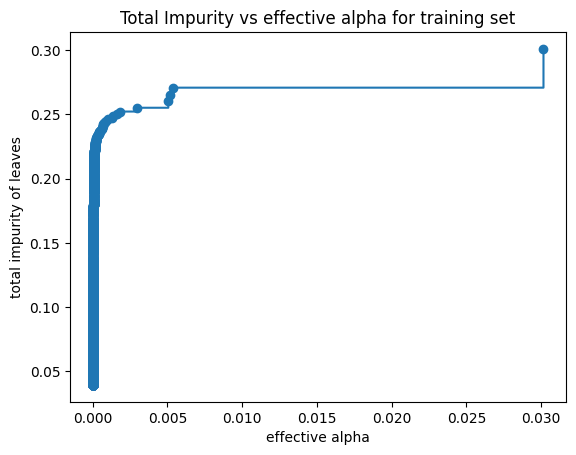

In [31]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [33]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(train_x, train_y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.07342309606104891


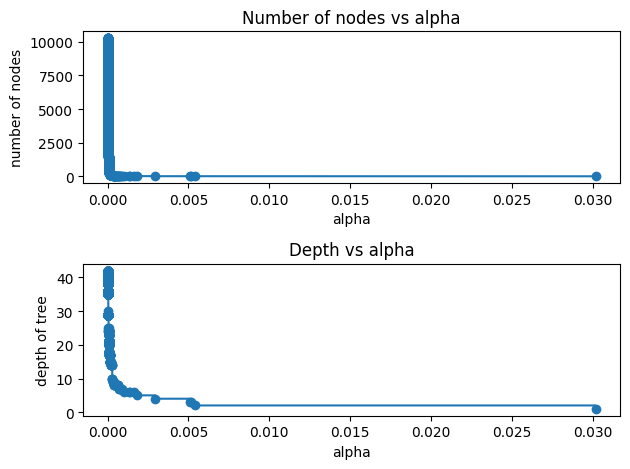

In [34]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [35]:
# Pruning also simplifies a decision tree by removing the weakest rules. 
# The weakest link is characterized by an effective alpha, 
# where the nodes with the smallest effective alpha are pruned first.
# test accuracy increases until we reach the optimal point(highest test accuracy score)

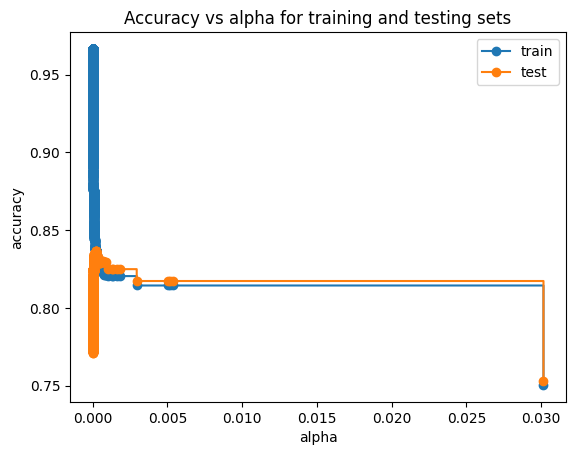

In [36]:
# Methodology 1: optimal accuracy (highest test accuracy score)
train_scores = [clf.score(train_x, train_y) for clf in clfs]
test_scores = [clf.score(test_x, test_y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
largest = max(test_scores)

In [38]:
for i in zip(ccp_alphas, test_scores):
    if i[1] == largest:
        print(i[0])

0.00022980683806523476
0.0002466918441829929
0.00024944257485409044
0.00025259837495139516


In [39]:
# Using best test accuracy score strategy fiting DT
dt_cart_best_accuracy_score_strategy = tree.DecisionTreeClassifier(ccp_alpha=0.00013413858993866412)
dt_cart_best_accuracy_score_strategy = dt_cart_best_accuracy_score_strategy.fit(train_x, train_y)
print('Training Accuracy: %0.4f' % dt_cart_best_accuracy_score_strategy.score(train_x, train_y))
print('Test Accuracy: %0.9f' % dt_cart_best_accuracy_score_strategy.score(test_x, test_y))

Training Accuracy: 0.8436
Test Accuracy: 0.834079231


In [40]:
# Methodology 2: Reduced error pruning (REP)
from sklearn.metrics import accuracy_score
depths_to_try = range(1, dt.get_depth() + 1)
validation_errors = []
for i in depths_to_try:
    tree2 = tree.DecisionTreeClassifier(max_depth=i)
    tree2.fit(train_x, train_y)
        # Predict on the validation set
    y_pred = tree2.predict(test_x)
    
    # Calculate the error (in this case, accuracy)
    error = 1 - accuracy_score(test_y, y_pred)
    
    # Append the error to the list
    validation_errors.append(error)

In [41]:
dt.get_depth()

40

In [42]:
best_depth = depths_to_try[validation_errors.index(min(validation_errors))]
best_error = min(validation_errors)

print(f"The best depth is {best_depth} with an error of {best_error}")

The best depth is 7 with an error of 0.17006464445549474


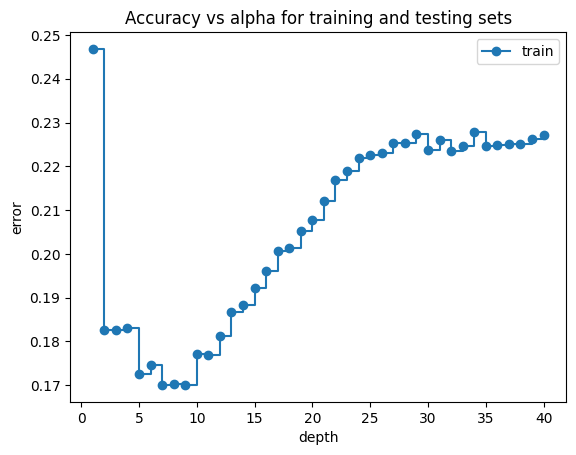

In [43]:
fig, ax = plt.subplots()
ax.set_xlabel("depth")
ax.set_ylabel("error")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(depths_to_try, validation_errors, marker="o", label="train", drawstyle="steps-post")
ax.legend()
plt.show()

In [44]:
# Methodology 3: Occam’s Razor
maximum_nodes = dt.get_n_leaves()
nodes_to_try = range(2, maximum_nodes + 1)
validation_errors = []
for i in nodes_to_try:
    tree2 = tree.DecisionTreeClassifier(max_leaf_nodes=i)
    tree2.fit(train_x, train_y)
        # Predict on the validation set
    y_pred = tree2.predict(test_x)
    
    # Calculate the error (in this case, accuracy)
    error = 1 - accuracy_score(test_y, y_pred)
    
    # Append the error to the list
    validation_errors.append(error)

In [45]:
best_nodes = nodes_to_try[validation_errors.index(min(validation_errors))]
best_error = min(validation_errors)

print(f"The best nodes is {best_nodes} with an error of {best_error}")


The best nodes is 73 with an error of 0.16476048400464116


In [52]:
dt_best_depth = tree.DecisionTreeClassifier(max_depth=best_depth)
dt_best_depth = dt_best_depth.fit(train_x, train_y)
predict_y = dt_best_depth.predict(test_x)
scores = cross_val_score(dt_best_depth, x, y, cv=10)
print('='*10 + "Best Depth Strategy" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % dt_best_depth.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print(' %0.9f' % dt_best_depth.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "Confusion Matrix" + '-'*10)
print(metrics.confusion_matrix(test_y, predict_y))
print('-'*10 + "Classification Report" + '-'*10)
print(metrics.classification_report(test_y, predict_y))
print('-'*10 + "Accuracy Score" + '-'*10)
print(metrics.accuracy_score(test_y, predict_y))
print('-'*10 + "Precision Score" + '-'*10)
print(metrics.precision_score(test_y, predict_y))
print('-'*10 + "Recall Score" + '-'*10)
print(metrics.recall_score(test_y, predict_y))

==========Best Depth Strategy==========
----------Training Accuracy----------
0.8322
----------Test Accuracy----------
 0.829935356
----------10-fold Cross Validatoin Accuracy----------
0.8270
----------Confusion Matrix----------
[[4094  450]
 [ 576  913]]
----------Classification Report----------
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4544
           1       0.67      0.61      0.64      1489

    accuracy                           0.83      6033
   macro avg       0.77      0.76      0.76      6033
weighted avg       0.83      0.83      0.83      6033

----------Accuracy Score----------
0.8299353555445053
----------Precision Score----------
0.6698459280997799
----------Recall Score----------
0.61316319677636


In [53]:
dt_best_nodes = tree.DecisionTreeClassifier(min_samples_split=best_nodes)
dt_best_nodes = dt_best_nodes.fit(train_x, train_y)
predict_y = dt_best_nodes.predict(test_x)
scores = cross_val_score(dt_best_nodes, x, y, cv=10)
print('='*10 + "Best Nodes Strategy" + '='*10)
print('-'*10 + "Training Accuracy" + '-'*10)
print('%0.4f' % dt_best_nodes.score(train_x, train_y))
print('-'*10 + "Test Accuracy" + '-'*10)
print(' %0.9f' % dt_best_nodes.score(test_x, test_y))
print('-'*10 + "10-fold Cross Validatoin Accuracy" + '-'*10)
print('%0.4f' % (scores.mean()))
print('-'*10 + "Confusion Matrix" + '-'*10)
print(metrics.confusion_matrix(test_y, predict_y))
print('-'*10 + "Classification Report" + '-'*10)
print(metrics.classification_report(test_y, predict_y))
print('-'*10 + "Accuracy Score" + '-'*10)
print(metrics.accuracy_score(test_y, predict_y))
print('-'*10 + "Precision Score" + '-'*10)
print(metrics.precision_score(test_y, predict_y))
print('-'*10 + "Recall Score" + '-'*10)
print(metrics.recall_score(test_y, predict_y))

==========Best Nodes Strategy==========
----------Training Accuracy----------
0.8546
----------Test Accuracy----------
 0.826951765
----------10-fold Cross Validatoin Accuracy----------
0.8249
----------Confusion Matrix----------
[[4132  412]
 [ 632  857]]
----------Classification Report----------
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4544
           1       0.68      0.58      0.62      1489

    accuracy                           0.83      6033
   macro avg       0.77      0.74      0.75      6033
weighted avg       0.82      0.83      0.82      6033

----------Accuracy Score----------
0.8269517652909001
----------Precision Score----------
0.6753349093774625
----------Recall Score----------
0.5755540631296172
